In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv(r"D:\ExceLR Solution\Assignments\EDA2\adult_with_headers.csv")  

In [3]:
df.head() 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape 

(32561, 15)

In [5]:
df.dtypes 

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

#### • Statistics summary Numerical Columns  

In [6]:
df.describe() 

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### • Statistics summary Categorical Columns 

In [7]:
df.describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


#### •  Missing value Detection 

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns 

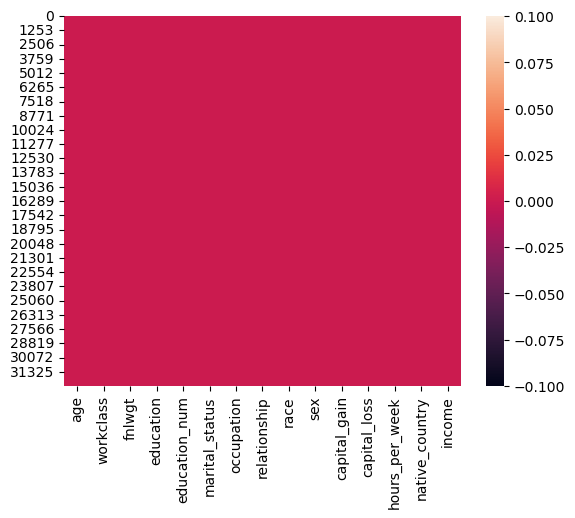

In [9]:
sns.heatmap(df.isnull()) 
plt.show() 

In [10]:
df.isnull().sum() 

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

#### • Standard  Scaling 

In [27]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler  
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 

In [12]:
 num_cols = list(df.select_dtypes(exclude='object').columns)

In [13]:
Standard_Scaler_CT = ColumnTransformer(transformers=[('StandardScaler',StandardScaler(),num_cols)],remainder='passthrough')  

In [14]:
Standard_Scale_data = Standard_Scaler_CT.fit_transform(df)

In [15]:
Standard_Scale_df = pd.DataFrame(data=Standard_Scale_data,columns=Standard_Scaler_CT.get_feature_names_out())

In [16]:
Standard_Scale_df.head(5)

,StandardScaler__age,StandardScaler__fnlwgt,StandardScaler__education_num,StandardScaler__capital_gain,StandardScaler__capital_loss,StandardScaler__hours_per_week,remainder__workclass,remainder__education,remainder__marital_status,remainder__occupation,remainder__relationship,remainder__race,remainder__sex,remainder__native_country,remainder__income
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,0.837109,-1.008707,1.134739,-0.14592,-0.21666,-2.222153,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,-0.042642,0.245079,-0.42006,-0.14592,-0.21666,-0.035429,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,1.057047,0.425801,-1.197459,-0.14592,-0.21666,-0.035429,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,-0.775768,1.408176,1.134739,-0.14592,-0.21666,-0.035429,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


#### • Min Max Scaling 

In [29]:
MinMax_Scaler_CT = ColumnTransformer(transformers=[('MinMaxScaler',MinMaxScaler(),num_cols)],remainder='passthrough')

In [31]:
Min_Max_scale_data = MinMax_Scaler_CT.fit_transform(df)

In [33]:
Min_Max_scale_df = pd.DataFrame(data=Min_Max_scale_data,columns=MinMax_Scaler_CT.get_feature_names_out()) 

In [34]:
Min_Max_scale_df.head()

,MinMaxScaler__age,MinMaxScaler__fnlwgt,MinMaxScaler__education_num,MinMaxScaler__capital_gain,MinMaxScaler__capital_loss,MinMaxScaler__hours_per_week,remainder__workclass,remainder__education,remainder__marital_status,remainder__occupation,remainder__relationship,remainder__race,remainder__sex,remainder__native_country,remainder__income
0,0.30137,0.044302,0.8,0.02174,0.0,0.397959,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,0.452055,0.048238,0.8,0.0,0.0,0.122449,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,0.287671,0.138113,0.533333,0.0,0.0,0.397959,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,0.493151,0.151068,0.4,0.0,0.0,0.397959,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,0.150685,0.221488,0.8,0.0,0.0,0.397959,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


* Min-Max Scaling: 

   * Scenario: When you need to scale features to a specific range, typically [0, 1] or [-1, 1]. 
   * Why: This technique is useful when the data has a known minimum and maximum. It preserves the relationships between the data points and is often used in algorithms that do not assume any distribution of the data, such as K-Nearest Neighbors (KNN) and Neural Networks.

* Standard Scaling (Z-score Normalization)
   * Scenario: When you need to standardize features to have a mean of 0 and a standard deviation of 1.
   * Why: This technique is preferred when the data follows a Gaussian distribution. It is commonly used in algorithms that assume normally distributed data, such as Linear Regression, Logistic Regression, and Principal Component Analysis (PCA).

#### • Data Encoding 

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder  
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 

In [18]:
cat_df = Standard_Scale_df.select_dtypes(include='object')

In [19]:
cat_df.head(2)

,StandardScaler__age,StandardScaler__fnlwgt,StandardScaler__education_num,StandardScaler__capital_gain,StandardScaler__capital_loss,StandardScaler__hours_per_week,remainder__workclass,remainder__education,remainder__marital_status,remainder__occupation,remainder__relationship,remainder__race,remainder__sex,remainder__native_country,remainder__income
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,0.837109,-1.008707,1.134739,-0.14592,-0.21666,-2.222153,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K


In [20]:
cat_df['remainder__race'].value_counts()

remainder__race
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: count, dtype: int64

In [21]:
cat_df['remainder__sex'].value_counts()

remainder__sex
 Male      21790
 Female    10771
Name: count, dtype: int64

In [22]:
less_than_5 = ['remainder__race','remainder__sex',] 
greter_than_5 = ['remainder__workclass','remainder__education','remainder__marital_status',
    'remainder__occupation','remainder__relationship','remainder__race','remainder__sex',
    'remainder__native_country' 
] 

In [23]:
cat_TF = ColumnTransformer([('ohe',OneHotEncoder(),less_than_5),('lable',OrdinalEncoder(),greter_than_5)],remainder='passthrough')  

In [24]:
final_data = cat_TF.fit_transform(Standard_Scale_df) 

In [25]:
final_data = pd.DataFrame(data=final_data,columns=cat_TF.get_feature_names_out())

In [26]:
final_data.head()

,ohe__remainder__race_ Amer-Indian-Eskimo,ohe__remainder__race_ Asian-Pac-Islander,ohe__remainder__race_ Black,ohe__remainder__race_ Other,ohe__remainder__race_ White,ohe__remainder__sex_ Female,ohe__remainder__sex_ Male,lable__remainder__workclass,lable__remainder__education,lable__remainder__marital_status,...,lable__remainder__race,lable__remainder__sex,lable__remainder__native_country,remainder__StandardScaler__age,remainder__StandardScaler__fnlwgt,remainder__StandardScaler__education_num,remainder__StandardScaler__capital_gain,remainder__StandardScaler__capital_loss,remainder__StandardScaler__hours_per_week,remainder__remainder__income
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,7.0,9.0,4.0,...,4.0,1.0,39.0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,<=50K
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0,9.0,2.0,...,4.0,1.0,39.0,0.837109,-1.008707,1.134739,-0.14592,-0.21666,-2.222153,<=50K
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,11.0,0.0,...,4.0,1.0,39.0,-0.042642,0.245079,-0.42006,-0.14592,-0.21666,-0.035429,<=50K
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,1.0,2.0,...,2.0,1.0,39.0,1.057047,0.425801,-1.197459,-0.14592,-0.21666,-0.035429,<=50K
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,9.0,2.0,...,2.0,0.0,5.0,-0.775768,1.408176,1.134739,-0.14592,-0.21666,-0.035429,<=50K


#### One-Hot Encoding

* Pros:

  * No Ordinal Relationship: One-Hot Encoding does not assume any ordinal relationship between categories, making it suitable for nominal data (e.g., colors, types of animals).
   * Model Compatibility: Many machine learning algorithms, especially those based on distance metrics (like KNN) or linear models, perform better with one-hot encoded data.
  * Interpretability: The encoded data is easy to interpret, as each category is represented by a separate binary feature.

* Cons:

  * High Dimensionality: One-Hot Encoding can lead to a significant increase in the number of features, especially with high cardinality categorical variables. This can result in increased memory usage and computational cost.
  *  Sparsity: The resulting encoded data is sparse, which can be inefficient for some algorithms and may require additional handling.
  *  Scalability: For datasets with many unique categories, One-Hot Encoding can become impractical due to the explosion in the number of features.

#### Label Encoding

* Pros:

     * Simplicity: Label Encoding is straightforward to implement and results in a single column of integers, making it memory efficient.
    *  Low Dimensionality: Unlike One-Hot Encoding, Label Encoding does not increase the number of features, which can be beneficial for algorithms that are sensitive to the curse of dimensionality.
   * Efficiency: It is computationally efficient and works well with algorithms that can handle ordinal relationships.

* Cons:

  * Ordinal Assumption: Label Encoding introduces an ordinal relationship between categories, which may not be appropriate for nominal data. This can mislead some algorithms into interpreting the encoded values as having a meaningful order.
  * Bias: Algorithms that rely on distance metrics (e.g., KNN, SVM) may perform poorly with label encoded data, as the numerical values can introduce bias.
  *  Interpretability: The encoded values may not be as interpretable as one-hot encoded data, especially when the categories do not have a natural order.


* When to Use Each

  * One-Hot Encoding: Preferred for nominal data with no inherent order and when the number of unique categories is manageable. It is commonly used with algorithms like Logistic Regression, Neural Networks, and Tree-based methods.
  * Label Encoding: Suitable for ordinal data where the categories have a meaningful order. It can also be used when the number of unique categories is very large, and the algorithm can handle ordinal relationships, such as in some tree-based methods.